In [35]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [36]:
pf_data = pd.read_csv('../1-rate-of-return/4_stocks_1995_2017.csv', index_col='Date')

In [37]:
pf_data.tail()

,PG,MSFT,F,GE
Date,,,,
2017-12-06,91.250000,82.779999,12.380,17.660000
2017-12-07,90.099998,82.489998,12.530,17.709999
2017-12-08,90.370003,84.160004,12.610,17.709999
2017-12-11,90.230003,85.230003,12.580,17.650000
2017-12-12,90.055000,85.650002,12.525,17.959999


## Plot returns of each assets

<AxesSubplot: xlabel='Date'>

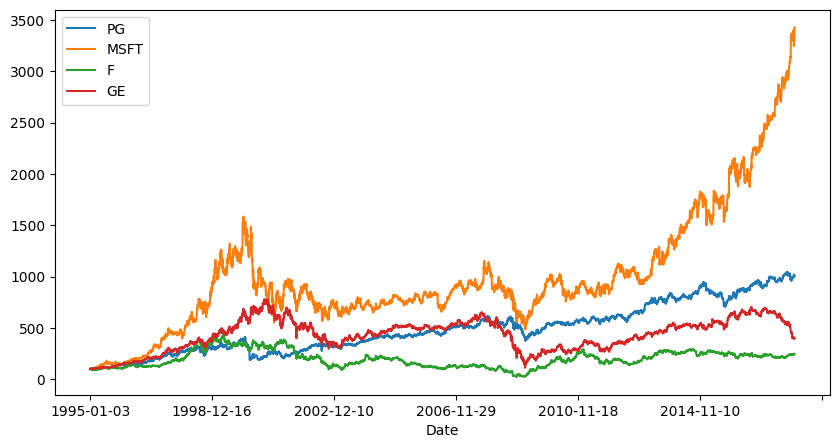

In [38]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [39]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [40]:
log_returns.corr()

,PG,MSFT,F,GE
PG,1.000000,0.232256,0.225131,0.366870
MSFT,0.232256,1.000000,0.327957,0.430587
F,0.225131,0.327957,1.000000,0.430410
GE,0.366870,0.430587,0.430410,1.000000


## Expected Portfolio Return

In [41]:
num_assets = len(pf_data.columns)
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.0871559 , 0.23643952, 0.29013268, 0.3862719 ])

In [42]:
sum(weights)

1.0

Daily log return

In [43]:
np.sum(weights * log_returns.mean())

0.00031746943830546096

Annual log return

In [44]:
np.sum(weights * log_returns.mean()) * 250

0.07936735957636525

## Expected Portfolio Risk

Expected Portfolio Variance

In [60]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.05954774746432239

Expected Portfolio Volatility

In [61]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.2440240714854221

## Plot the Efficient Frontier

Generate random weights

In [66]:
p_returns = []
p_volatilities = []

step = 10
max = 100
for x1 in range(0, max + step, step):
    for x2 in range(0, max + step - x1, step):
        for x3 in range(0, max + step - x1 - x2, step):
            x4 = max - x1 - x2 - x3
            weights = np.array([x1, x2, x3, x4], dtype=float)
            weights /= 100
            p_returns.append(np.sum(weights * log_returns.mean()) * 250)
            p_volatilities.append(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

p_returns = np.array(p_returns)
p_volatilities = np.array(p_volatilities)

Or:

In [71]:
p_returns = []
p_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    p_returns.append(np.sum(weights * log_returns.mean()) * 250)
    p_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

p_returns, p_volatilities

([0.08582384256221716,
  0.07710944870382659,
  0.09722071930323439,
  0.09209548195914317,
  0.09479974997478784,
  0.05883756408909729,
  0.08450991878808982,
  0.09867783004519504,
  0.0812207830333973,
  0.09280740368964643,
  0.08383762670995608,
  0.0849582258099984,
  0.08797883771953376,
  0.09462583190521155,
  0.09296361036980517,
  0.10752619937830915,
  0.060532078025309244,
  0.08684241481600022,
  0.08030316917618951,
  0.09267575809081094,
  0.08894777187692723,
  0.06519624405456687,
  0.1007677881731634,
  0.09452809812737185,
  0.09863104731332811,
  0.08565965370217289,
  0.12199068748797733,
  0.07608914465209161,
  0.10415826220449687,
  0.08126970750854944,
  0.10033988125113948,
  0.07699088241524307,
  0.07833355636324363,
  0.07436546961594052,
  0.0774575276469351,
  0.08916440719292336,
  0.09633350127536161,
  0.09072566637957698,
  0.1111710946929646,
  0.08383202370716045,
  0.09236196172317251,
  0.08825901160313945,
  0.07450852825698998,
  0.11181630971

In [72]:
df = pd.DataFrame({ 'Return': p_returns, 'Volatility': p_volatilities })

Text(0, 0.5, 'Expected Return')

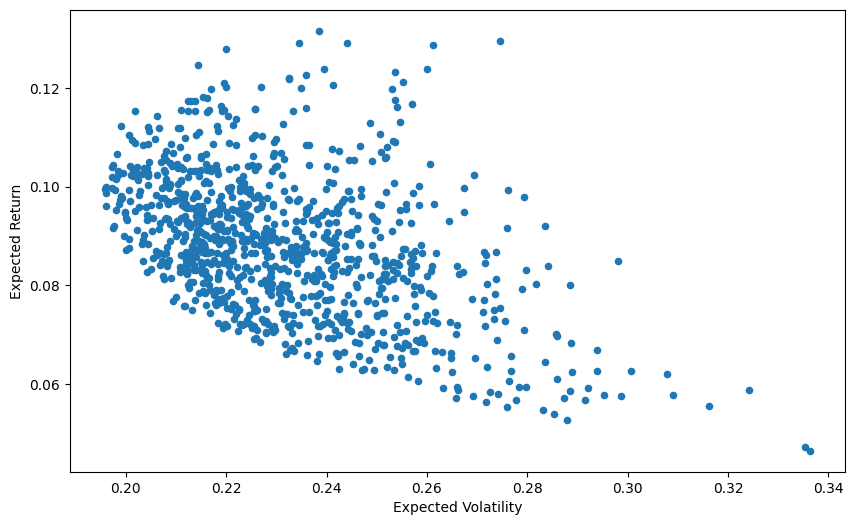

In [73]:
df.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')